# Example of use of the module `doe`

We can import the routine using `import doe`. Note that the file `doe.py` must be in the same directory than your code. Note that we also need the module `numpy`.

In [2]:
import doe
import numpy as np

We can create our first model matrix by hand, or using `doe.model_matrix(name, factors)`.

In [3]:
model = doe.model_matrix(name="interaction", factors=3)
print("Model matrix =\n", model)

Model matrix =
 [[1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


Let's now use this model to fit the following data, stored in two `numpy` arrays called `X` and `y`. In this example, suppose that the true model is $y=1+x_1-2x_2-x_1x_3$. To make things more interesting, we will add some noise to the responses.

In [4]:
X = np.array([
    [3, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 2, 0],
    [0, 1, 3],
    [5, 7, 1],
    [4, 3, 3],
    [6, 2, 3],
])

y = 1 + X[:, 0] - 2 * X[:, 1] - X[:, 0] * X[:, 2] + np.random.normal(0, 1, size=X.shape[0])

print("X =\n", X)

print("y =\n", y)

X =
 [[3 1 0]
 [2 1 1]
 [3 3 1]
 [1 2 0]
 [0 1 3]
 [5 7 1]
 [4 3 3]
 [6 2 3]]
y =
 [  2.66546002  -1.56804855  -5.62983413  -1.59767992  -2.31802858
 -12.47189768 -14.98634881 -14.48430401]


We can now use `fitlm(X, y, model)` to fit the model to the data. The function returns the coefficients of the model.

In [5]:
coefficients = doe.fitlm(X=X, y=y, model=model)
coefficients_name = ["a_0", "a_1", "a_2", "a_3", "a_12", "a_13", "a_23"]
print("Coefficients :")
for coefficient, name in zip(coefficients, coefficients_name):
    print(f"{name} = {coefficient:.3f}")

Coefficients :
a_0 = 0.352
a_1 = 1.479
a_2 = -1.378
a_3 = 1.210
a_12 = -1.547
a_13 = -1.427
a_23 = -0.164


We can now check how good our model is. One method we can use is compare the true responses `y` with predictions made using `doe.predict(X, coefficients, model)` and plot the results using the library `matplotlib.pyplot`. The closer the points are to the line $y=x$, the better the model. Another way would be to compute the root mean square error (RMSE) of the model.

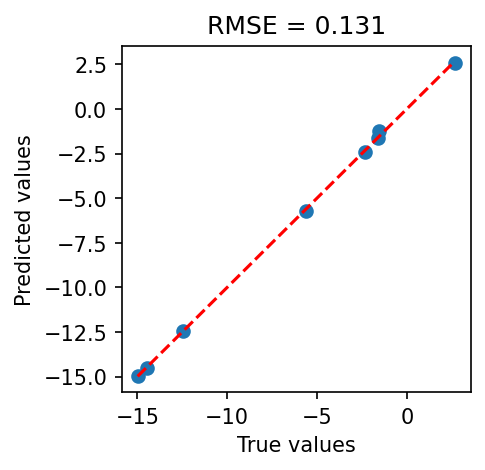

In [6]:
import matplotlib.pyplot as plt

y_pred = doe.predict(X=X, coefficients=coefficients, model=model)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

plt.figure(figsize=(3, 3), dpi=150)
plt.title(f"RMSE = {rmse:.3f}")
plt.scatter(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

We can also check the ANOVA using `doe.anova(X, y, model)`.

In [7]:
doe.anova(X=X, y=y, model=model)

{'ss_regression': 322.3141573754483,
 'ss_residual': 0.1380388078211069,
 'ss_lackoffit': 5.340936917050936e-05,
 'ss_pureerror': 0.1379853984519364,
 'ss_total': 321.71566870651895}

Let's now consider new data that won't suit the model. For example, suppose that the true model has linear terms $y=1+x_1-2x_2-3x_3^2$.

In [8]:
X = np.array([
    [3, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 2, 0],
    [0, 1, 3],
    [5, 7, 1],
    [4, 3, 3],
    [6, 2, 3],
])

y = 1 + X[:, 0] - 2 * X[:, 1] - 3 * X[:, 2]**2 + np.random.normal(0, 1, size=X.shape[0])

print("X =\n", X)

print("y =\n", y)

X =
 [[3 1 0]
 [2 1 1]
 [3 3 1]
 [1 2 0]
 [0 1 3]
 [5 7 1]
 [4 3 3]
 [6 2 3]]
y =
 [  1.9646509   -1.93131476  -5.53577037  -3.06406464 -28.19477513
 -10.71167085 -27.52788519 -24.05288188]


As before, let's try fit the model and print the coefficients.

In [9]:
coefficients = doe.fitlm(X=X, y=y, model=model)
coefficients_name = ["a_0", "a_1", "a_2", "a_3", "a_12", "a_13", "a_23"]
print("Coefficients :")
for coefficient, name in zip(coefficients, coefficients_name):
    print(f"{name} = {coefficient:.3f}")

Coefficients :
a_0 = -2.058
a_1 = 0.895
a_2 = -3.152
a_3 = -13.228
a_12 = 5.174
a_13 = 2.528
a_23 = 1.230


Plotting the predictions against the true responses, we can see that the model is not so good. The RMSE is also much higher than before.

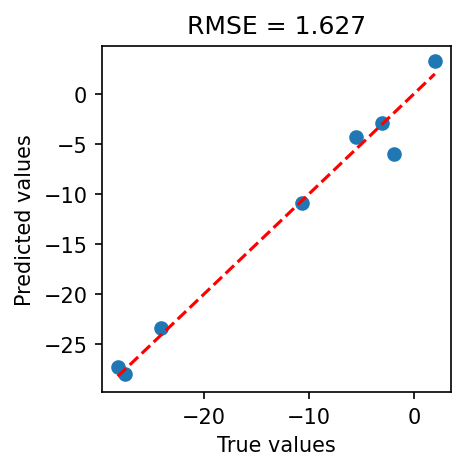

In [10]:
import matplotlib.pyplot as plt

y_pred = doe.predict(X=X, coefficients=coefficients, model=model)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

plt.figure(figsize=(3, 3), dpi=150)
plt.title(f"RMSE = {rmse:.3f}")
plt.scatter(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [11]:
doe.anova(X=X, y=y, model=model)

{'ss_regression': 1028.0871347094308,
 'ss_residual': 21.164724603509548,
 'ss_lackoffit': 0.008188962275049757,
 'ss_pureerror': 21.1565356412345,
 'ss_total': 1067.1791716785572}